# Monte Carlo method

### Exercise: area of a circle

3.1248


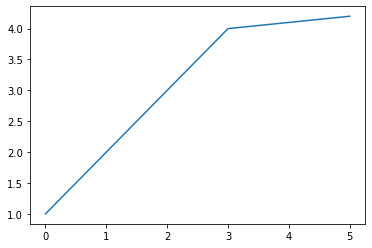

In [100]:
import random
import matplotlib.pyplot as plt



n=0.0;
r=10000;
for i in range(1,r):
    x=random.uniform(-1, 1);
    y=random.uniform(-1, 1);
    if (x*x+y*y)<=1:
        n=n+1;
    
print(4*n/r)
plt.plot([1,2,3,4,4.1,4.2])

plt.show()

# Diffusion Monte Carlo

### Find the ground state wavefunction and energy for the harmonic oscillator


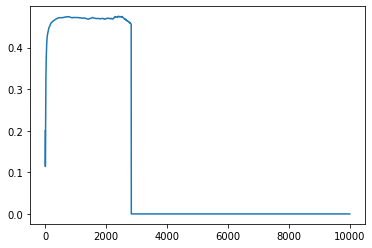

In [7]:
#INPUT

import numpy as np
import matplotlib.pyplot as plt
import math

#constants
n0=500;
nMax=2000;
t0=1000;
deltaT=0.01;
xMin=-20.0;
xMax=20.0
nb=200; #number of spatial boxes
# hBar = 1.054571726*pow(10,-47) #hbar=1

e_R = 0.2

steps=math.floor(t0/deltaT)

er1=[0]*(steps+1) #contains all the energies
er1[0]=e_R
totalE=e_R
er2=[0]*(steps+1) #contains all the reference energies
er2[0]=e_R

psips=initialise_replicas(n0,nMax) #two dimensional matrix psips


for i in range (0,steps):
#     print(psips)
    psips=walk(psips,deltaT)
    psips, e_R, n1, n2 = branch(psips,e_R,deltaT,nMax)
    er1[i+1]=e_R
    totalE+=e_R
    er2[i+1]=totalE/(i+2)
#     print(er1[i+1], end=" ");    print(er2[i+1], end=" "); print (n1)
    if n1==0:
        break
    if n2==0:
        break
        
plt.plot(er2)
plt.show()

In [4]:
#INITIALISE REPLICAS


def initialise_replicas(n0,nMax):
    psips=[[0 for i in range(0,2)] for i in range (0,nMax)];
    for i in range (0,n0):
        psips[i][0]=1;


    return psips;



In [5]:
#WALK
import math
from random import gauss

def walk(psips,deltaT):
    for i in range (0,len(psips)):
        if psips[i][0]==1:
            psips[i][1]=psips[i][1]+math.sqrt(deltaT)*gauss(0.0,1.0);

    return psips;



In [6]:
#BRANCH
import math
import random


def branch(psips,e_R,deltaT,nMax):
    

    hbar = 1.054571726*pow(10,-34) 
#     calculate the initial number of replicas
    nInitial=0
    for i in range(0,len(psips)):
        if psips[i][0]==1:
            nInitial+=1
            
#     determine a stopping point
    last=0
    for i in reversed(range(0,len(psips))):
        if psips[i][0]==1:
            last=i
            break
    
#     birth-death process

    m_0=0; m_1=0; m_2=0; m_3=0 #number of particles that have m=0/1/2/3
    
    
    vSum=0
    nFinal=0
    for i in range(0,last+1):
        if(psips[i][0]==1):
            v= 0.5*pow(psips[i][1],2)
            w= math.exp(-(v-e_R)*deltaT)
            u= random.uniform(0,1)
            m= min(math.modf(w+u)[1],3) # each particle is replaced by m ones
            if m==0:
                m_0+=1
                psips[i][0]=0; #dead
            if m==1:
                m_1+=1
                vSum+=v
                nFinal+=1
            if m==2:
                m_2+=1
                vSum+=2*v
                nFinal+=2
                for j in range(0,len(psips)):
                    if(psips[j][0]==0):
                        psips[j][0]=1
                        psips[j][1]=psips[i][1]
                        break
            if m==3:
                m_3+=1
                vSum+=3*v
                nFinal+=3
                for j in range(0,len(psips)):
                    if(psips[j][0]==0):
                        psips[j][0]=1
                        psips[j][1]=psips[i][1]
                        break
                for j in range(0,len(psips)):
                    if(psips[j][0]==0):
                        psips[j][0]=1
                        psips[j][1]=psips[i][1]
                        break

#     print(m_0,end=" ");    print(m_1,end=" ");    print(m_2,end=" ");    print(m_3,end=" ");

#     calculate energies and average potential
    if nFinal!=0:
        vAverage=vSum/nFinal
        e_R=vAverage + hbar*(1-nFinal/nInitial)/deltaT

    return psips, e_R, nInitial, nFinal;



In [86]:
#COUNT

In [80]:
#TEST

In [ ]:
#OUTPUT